---

# Ensemble Methods: Random Forest

**Ensemble methods** are machine learning methods that aggregate the predictions of a group of base learners in order to form a single learning model. For example, imagine that each person in this [video](https://www.youtube.com/watch?v=iOucwX7Z1HU&t=203s) is a trained machine learning model and notice the average of their predictions is a much more accurate prediction that the individual predictions.


## Random Forests 
Technically speaking, the above bagging model is called a **Random forest**. Such a model exists inside the ```sklearn.ensemble``` module, and is the ```DecisionTreeClassifier``` class. However, the random forest algorithm used in training the ```RandomForestClassifier``` class introduces extra randomness when growing trees; instead of searching for the best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater diversity of trees which results in even lower variance of the fit model. 

Run the following code cell and compare the three models. 


----

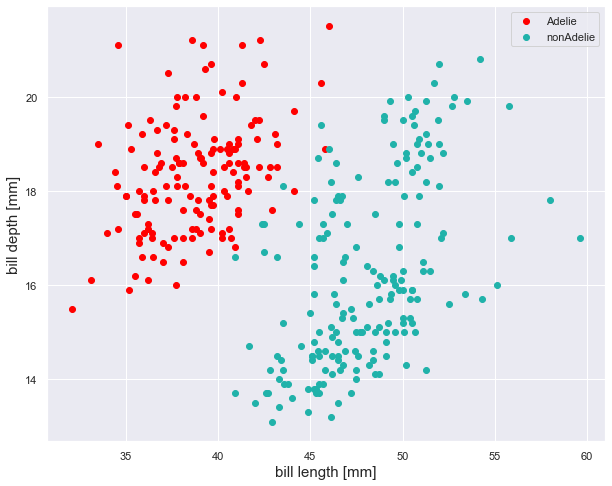

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data

penguins = pd.read_csv("penguins.csv")

penguins = penguins.dropna()

# Plot the data

penguins.species[penguins.species != "Adelie"] = "nonAdelie"

animals = ["Adelie", "nonAdelie"]
colors = ["red", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(animals, colors):
    temp_df = penguins[penguins.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()

----

As you can tell, no one model would ever hope to learn seperation on this dataset. Let us next compare a decision tree. 



----

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


X = penguins[["bill_length_mm",
          "bill_depth_mm"]].to_numpy()

y = penguins["species"].to_numpy()

y = np.where(y == "Adelie",-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

          -1       0.97      0.98      0.98        65
           1       0.99      0.97      0.98        69

    accuracy                           0.98       134
   macro avg       0.98      0.98      0.98       134
weighted avg       0.98      0.98      0.98       134
 

Bagging Classification Report
              precision    recall  f1-score   support

          -1       0.97      0.94      0.95        65
           1       0.94      0.97      0.96        69

    accuracy                           0.96       134
   macro avg       0.96      0.95      0.96       134
weighted avg       0.96      0.96      0.96       134
 

Forest Classification Report
              precision    recall  f1-score   support

          -1       0.97      0.94      0.95        65
           1       0.94      0.97      0.96        69

    accuracy                           0.96       134
   macro avg       0.96      0.95     

---

As obserbed in the output of the above code cell, the accuracy of the bagging classifier with decision stumps and the random forest are the same. However, in theory the random forest model will have less variance than the random forest. Another way we can compare these two models with identical accuracy is to view the decision regions generated by the. Let's next do this by running the following three code cells. 



---

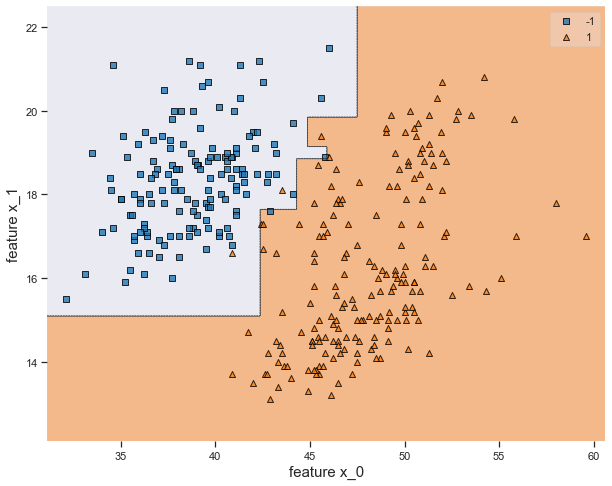

In [5]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

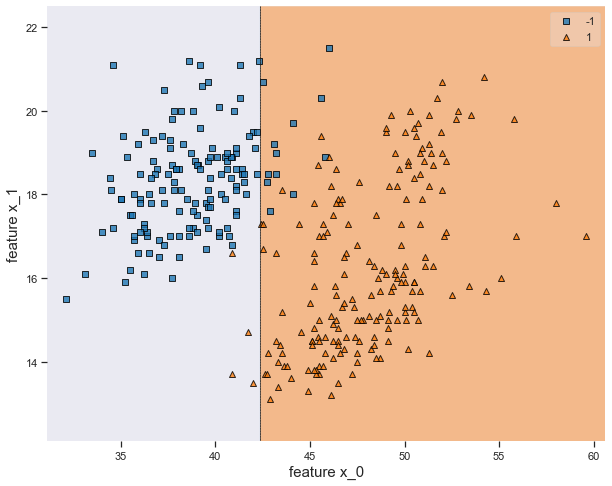

In [6]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

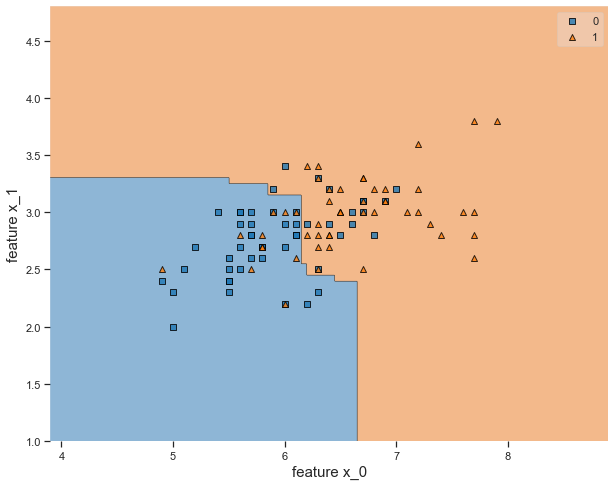

In [12]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

---

It may be the case that we can improve the performance of all three models by considering more features in the dataset. With this in mind, let's consider these three models on all 4 features of the dataset. This can be done by running the following code cell. 



---

In [7]:
from sklearn.ensemble import RandomForestClassifier

X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 2)



tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

          -1       0.93      0.96      0.95        54
           1       0.97      0.95      0.96        80

    accuracy                           0.96       134
   macro avg       0.95      0.96      0.95       134
weighted avg       0.96      0.96      0.96       134
 

Bagging Classification Report
              precision    recall  f1-score   support

          -1       0.94      0.91      0.92        54
           1       0.94      0.96      0.95        80

    accuracy                           0.94       134
   macro avg       0.94      0.93      0.94       134
weighted avg       0.94      0.94      0.94       134
 

Forest Classification Report
              precision    recall  f1-score   support

          -1       0.94      0.91      0.92        54
           1       0.94      0.96      0.95        80

    accuracy                           0.94       134
   macro avg       0.94      0.93     

---

## Feature Importance 

One cool thing about random forests is that these models make it simple to measure feature importance of each feature. Scikit-Learn does this by measuring a feature's importance by looking at how much the tree nodes that use that feature reduce impurity on average across all trees in the forest. For example, consider running the following code cell. 


---

In [8]:
names = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

bill_length_mm 0.484
bill_depth_mm 0.158
flipper_length_mm 0.338
body_mass_g 0.02
